In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
df = pd.read_csv("datasets/AAPL.csv")
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df = df.reset_index()['close']
df.shape

(1258,)

In [4]:
type(df)

pandas.core.series.Series

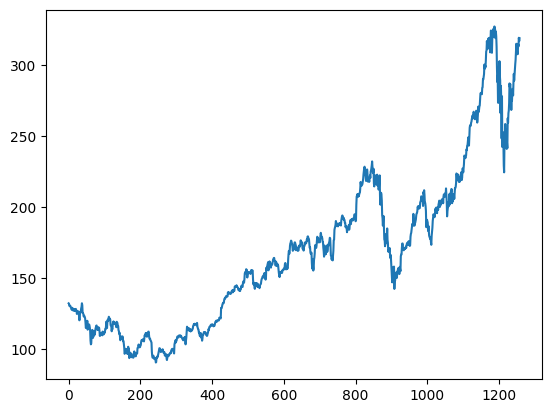

In [5]:
plt.plot(df)

#### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1)) # -1 infers no of rows automatically

In [7]:
df.shape

(1258, 1)

In [8]:
type(df)

numpy.ndarray

In [9]:
# Splitting the dataset into train and test split 

training_size = int(len(df)*0.65)
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [17]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [12]:
test_data.shape

(441, 1)

In [13]:
# convert an array of values into a dataset matrix 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] 
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)


[1,2,3,4,5,6,.,.,.,.] lets say this is our dataset 

time_step = 100 
X_train will contain 100 values starting from [1,2,3..] and y_train will contain 101 value 

X_test will contain 100 values starting from 65th percentage and y_test will contain 101 value 
 

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [22]:
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [21]:
X_test.shape # 100 features

(340, 100)

# Reshaping input to be in 3D 

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Create an LSTM model 

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0316 - val_loss: 0.0524
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 9.2006e-04 - val_loss: 0.0042
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6.7832e-04 - val_loss: 0.0044
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 6.8977e-04 - val_loss: 0.0038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 5.8884e-04 - val_loss: 0.0041
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.7379e-04 - val_loss: 0.0039
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 5.8329e-04 - val_loss: 0.0043
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 6.1422e-04 - val_loss: 0.0038
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 5.9072e-04 - val_loss: 0.0037
Epoch 12/100
12/12 ━

In [29]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [30]:
# Transforming back to original form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
# Calculate RMSE 
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) 

143.5211151605471

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict)) 

239.7278051992516

# Visualization 

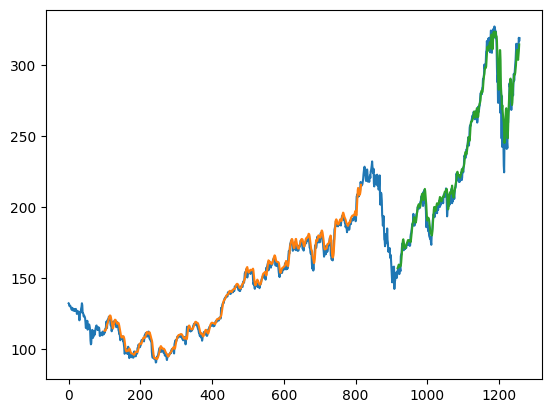

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predict Future 30 days closing price 

In [ ]:
len(test_data) 

441

to predict the next days price after test_data ends i need to consider 100 days prior to it. i.e of test data last 100 days 

In [39]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [41]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9579906]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [42]:
# creating time variable 
day_new = np.arange(1,101)
day_pred=np.arange(101,131)

len(df)-100 to 130 days then

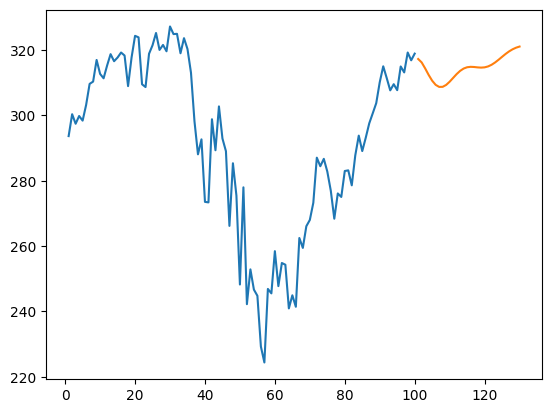

In [46]:
plt.plot(day_new,scaler.inverse_transform(df[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))